# Discrete Probability Distribution Plot

In [1]:
import os

try:
    import jax
except:
    %pip install jax
    import jax
import jax.numpy as jnp

try:
    import matplotlib.pyplot as plt
except:
    %pip install matplotlib
    import matplotlib.pyplot as plt

try:
    import seaborn as sns
except:
    %pip install seaborn
    import seaborn as sns

In [2]:
dev_mode = "DEV_MODE" in os.environ

if dev_mode:
    import sys

    sys.path.append("../scripts")
    import pyprobml_utils as pml
    from latexify import latexify

    latexify(scale_factor=2, fig_height=1.5)

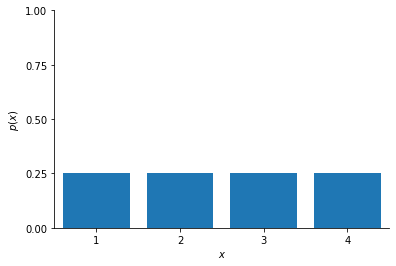

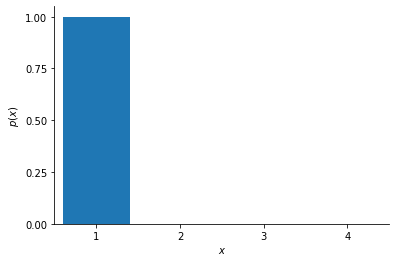

In [3]:
# Bar graphs showing a uniform discrete distribution and another with full prob on one value.

x = jnp.arange(1, 5)
uniform_probs = jnp.repeat(1.0 / len(x), len(x))


def make_graph(probs, save_name):
    plt.figure()
    plt.bar(x, probs, align="center")
    plt.xlim([min(x) - 0.5, max(x) + 0.5])
    plt.xticks(x)
    plt.yticks(jnp.linspace(0, 1, 5))
    plt.xlabel('$x$')
    plt.ylabel('$p(x)$')
    sns.despine()
    if dev_mode and len(save_name) > 0:
        pml.savefig(save_name)


make_graph(uniform_probs, "uniform_histogram_latexified.pdf")
make_graph([1, 0, 0, 0], "delta_histogram_latexified.pdf");

## Demo

You can see different examples of discrete distributions by changing the seed in the following demo.

In [4]:
from ipywidgets import interact


@interact(seed=(0, 10))
def generate_random(seed):
    key = jax.random.PRNGKey(seed)
    probs = jax.random.uniform(key, shape=(4,))
    probs = probs / jnp.sum(probs)
    make_graph(probs, save_name="")

interactive(children=(IntSlider(value=5, description='seed', max=10), Output()), _dom_classes=('widget-interac…